#### C(cost) : 정규화 매개변수, 오차에 대한 패널티
- C가 작으면 패널티가 커지고 C가 커지면 패널티가 줄어듦
- C값을 증가시키면 모델이 좀더 복잡해짐(좀 더 자세하게 결정경계를 찾아내는 방식)
<br> C값이 작으면 이상치들이 있을 가능성을 크게 잡아서 일반적인 결정 경계를 만들어냄

#### gamma
- gamma값을 증가시키면 각각의 데이터 포인트가 영향력을 행사하는 거리가 짧아지고
<br> gamma값이 작으면 영향력을 행사하는 거리가 길어짐


cost와 gamma가 너무 크면 과대적합의 위험이 있고 너무 작으면 과소적합의 위험이 있음

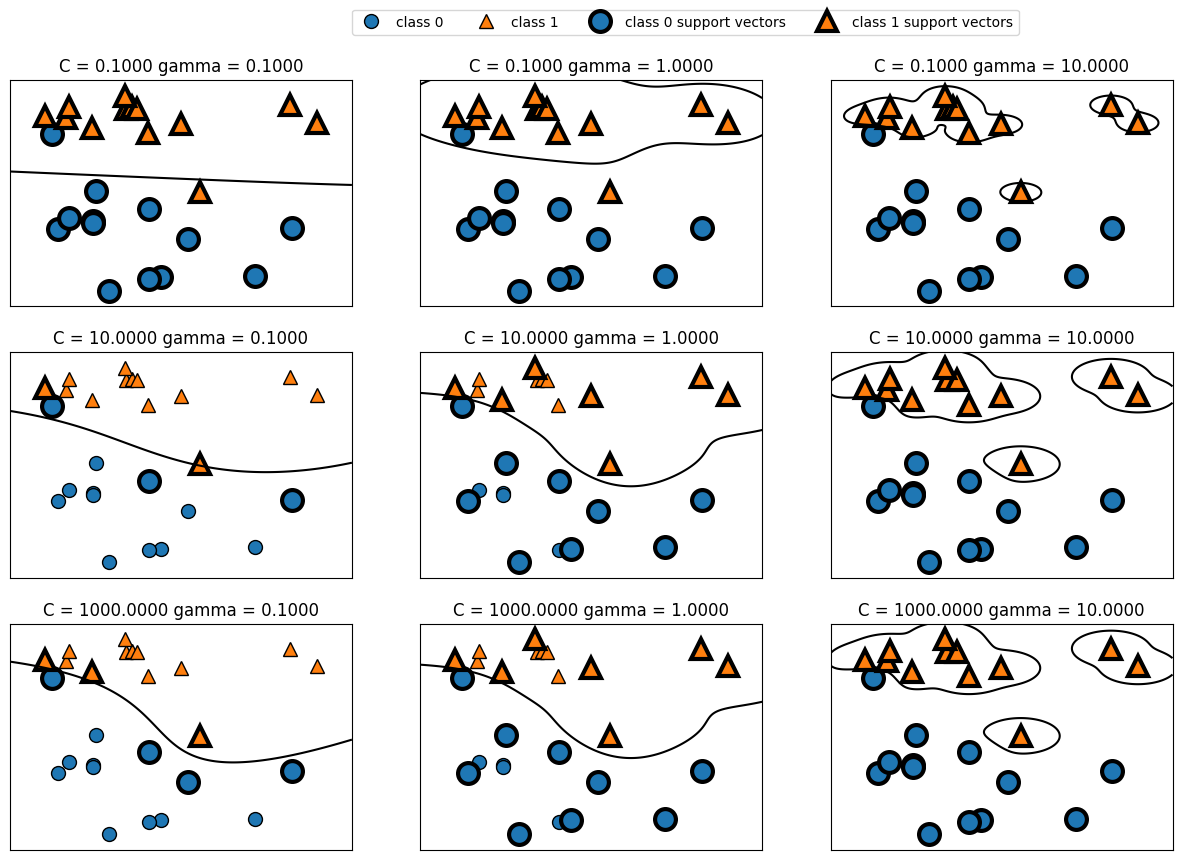

In [1]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 1, 3]):
    for a, gamma in zip(ax, [-1, 0, 1]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

        # ncol = 4, 4개의 셀을 합쳐서 범례 표시
axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"], ncol=4, loc=(1, 1.2))

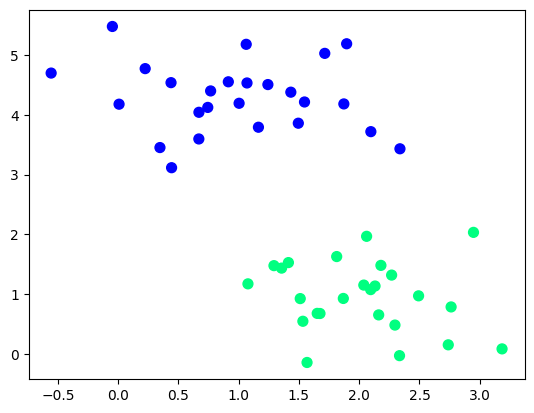

In [2]:
# 랜덤 데이터셋, n_samples 샘플개수, centers 중심좌표, cluster_std 클러스터의 표준편차

from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')

(-1.0, 3.5)

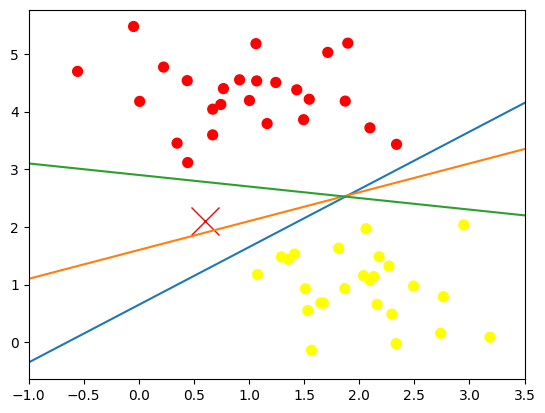

In [4]:
import numpy as np

xfit = np.linspace(-1, 3.5, 10) # -1 ~ 3.5 10등분
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')

# X 데이터는 어느 클래스로 분류될까요?
plt.plot([0.6], [2.1], 'x', color='red', markersize=20)

#기울기와 절편에 따라 구분선이 달라짐

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b)
plt.xlim(-1, 3.5)

In [6]:
from sklearn.svm import SVC

# 선형분류 linear, 비선형분류 rbf(기본값)

model = SVC(kernel='linear')
#model = SVC()
model.fit(x, y)

SVC(kernel='linear')

In [7]:
#서포트 벡터의 좌표값

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

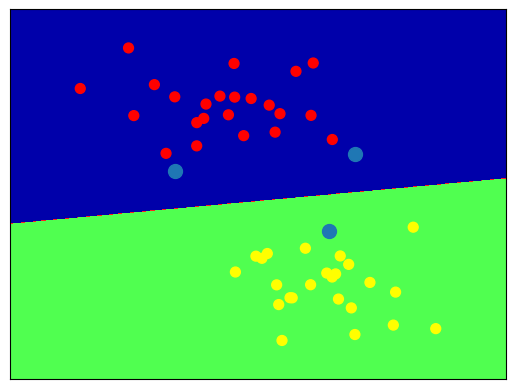

In [9]:
import mglearn

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100)
mglearn.plots.plot_2d_classification(model, x)

In [10]:
a,b = np.meshgrid([10,20],[30,40])

print(a)
#print(a.ravel()) # 행렬을 1차원 배열로 만드는 함수
#print(a.ravel().T) # 행렬전치, Transposition Arrays and Swapping Axes

c = np.vstack([a.ravel(), b.ravel()]).T
#c = np.vstack([a.ravel(), b.ravel()])
print(c)

[[10 20]
 [10 20]]
[[10 30]
 [20 30]
 [10 40]
 [20 40]]


In [11]:
#reshape 연습
a=np.array([[10,20,30],[40,50,60]])
print(a.shape)
b=a.reshape(3,2)
print(a)
print(b)
print(b.shape)

(2, 3)
[[10 20 30]
 [40 50 60]]
[[10 20]
 [30 40]
 [50 60]]
(3, 2)


In [12]:
import numpy as np
def plot_svc(model,ax=None):

    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치
    
    # 판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)    

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P,
               levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])    

    # 서포트 벡터 출력
    ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

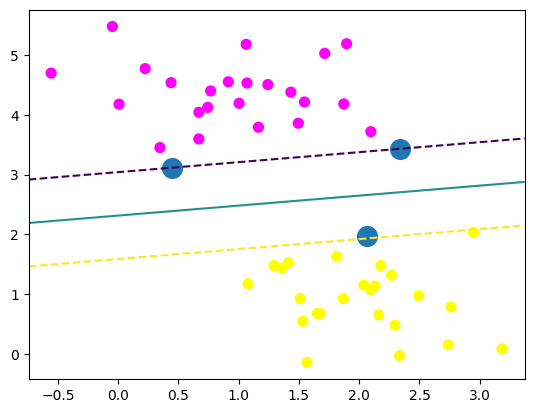

In [13]:
#서포트 벡터 표시

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='spring')

plot_svc(model)

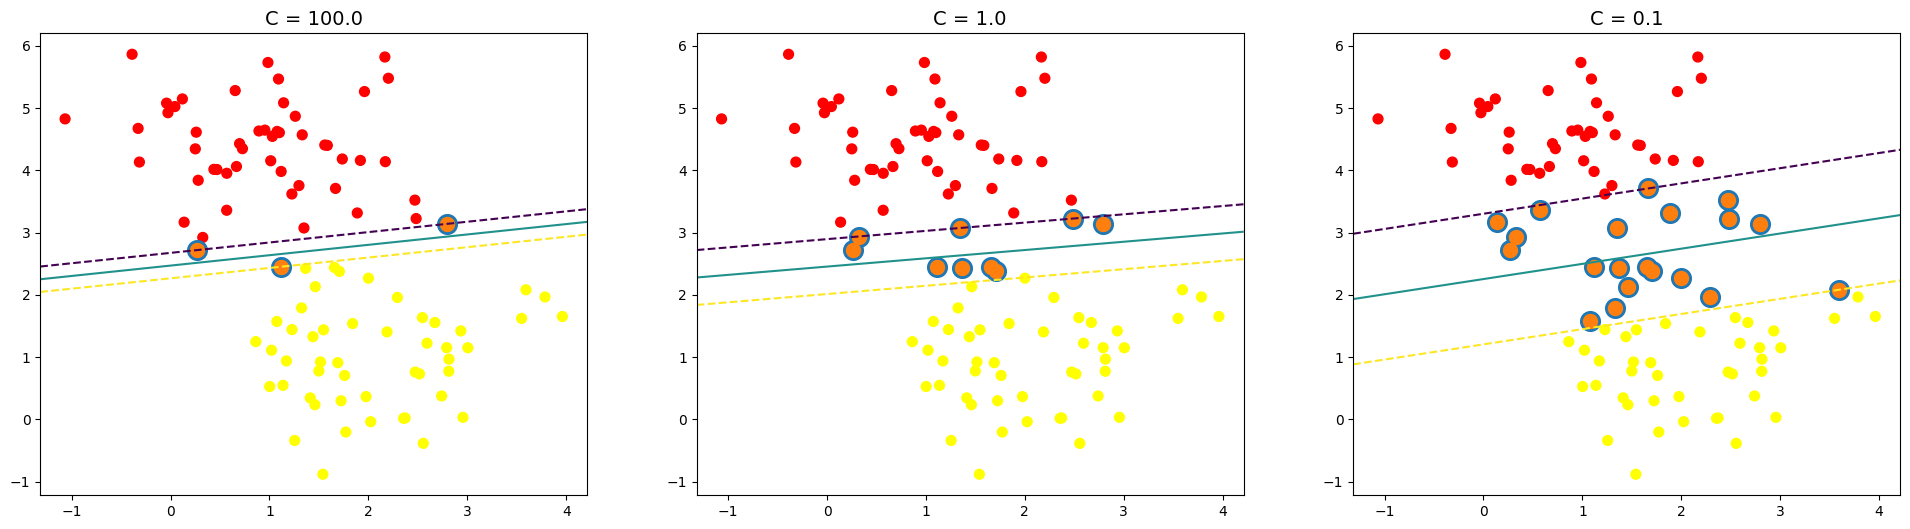

In [16]:
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)


fig, ax = plt.subplots(1, 3, figsize=(24, 6))
for axi, cost in zip(ax, [100, 1, 0.1]):
    model = SVC(kernel='linear', C=cost).fit(x, y)
    axi.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('C = {0:.1f}'.format(cost), size=14)

# cost가 크면 과적합될 수 있음

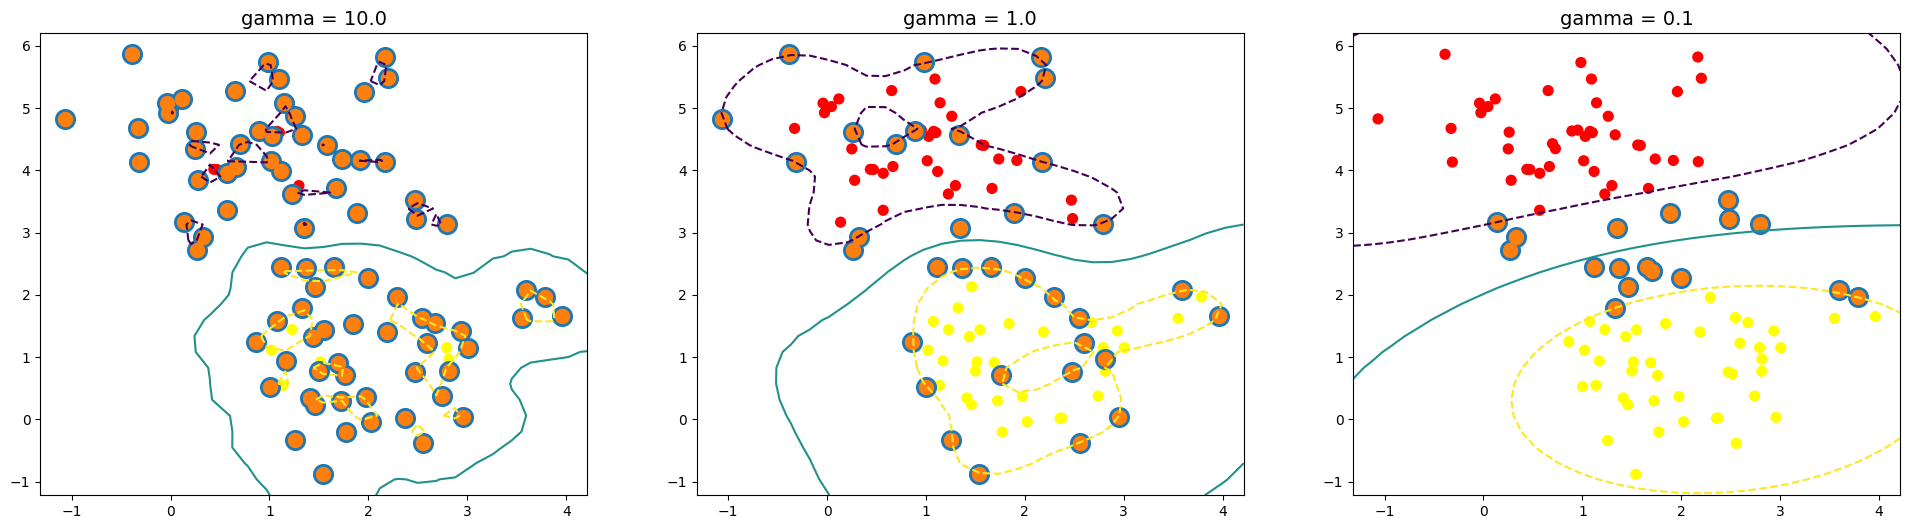

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
for axi, g in zip(ax, [10, 1, 0.1]):
    model = SVC(kernel='rbf', gamma=g).fit(x, y)
    axi.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('gamma = {0:.1f}'.format(g), size=14)

# gamma